# Data Scientist Associate Practical Exam Submission

Practical Exam - Electric Moped Reviews
Instructions
● Use Python or R to perform the tasks required

● Write your solutions in the workspace provided from your certification page

● Include all of the visualizations you create to complete the tasks

● Visualizations must be visible in the published version of the workspace. Links to external visualizations will not be accepted.

● You do not need to include code unless the question says you must

Background

EMO is a manufacturer of electric motorcycles. EMO launched its first electric motorcycle in India in 2019. The product team has been asking website users to rate the motorcycles. Ratings from owners help the product team to improve the quality of the motorcycles. Ratings from non-owners help the product team add new features. They hope the new features will increase the number of new customers. The product team wants to extend the survey. But, they want to be sure they can predict whether the ratings came from owners or non-owners.

![aa](aa.PNG)


## Task 1 
    For every column in the data:
a. State whether the values match the description given in the table above.

b. State the number of missing values in the column

c. Describe what you did to make values match the description if they did not match.



In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('electric_bike_ratings_2212.csv')
# Loop through each column in the DataFrame
for col in df.columns:
    # Print the column name
    print(f'Column: {col}')
    
    # Check if the values match the description
    if col == 'owned':
        print(f'Data type: {df[col].dtype}')
        print(f'Values match description: {df[col].isin([0, 1]).all()}')
        print(df[col].isna().sum())
    elif col == 'make_model':
        print(f'Data type: {df[col].dtype}')
        possible_values = ['Nielah-Eyden', 'Nielah-Keetra', 'Lunna-Keetra', 'Hoang-Keetra', 'Lunna-Eyden', 'Hoang-Eyden']
        print(f'Values match description: {df[col].isin(possible_values).all()}')
        print(df[col].isna().sum())
    elif col == 'review_month':
        print(f'Data type: {df[col].dtype}')
        possible_values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        print(f'Values match description: {df[col].isin(possible_values).all()}')
        print(df[col].isna().sum())
    elif col == 'web_browser':
        print(f'Data type: {df[col].dtype}')
        possible_values = ['Chrome', 'IE', 'Firefox', 'Safari', 'Android', 'Opera']
        print(f'Values match description: {df[col].isin(possible_values).all()}')
        print(df[col].isna().sum())
    elif col == 'reviewer_age':
        print(f'Data type: {df[col].dtype}')
        a = (df[col].dtype == int) and (df[col].min() >= 1) and (df[col].max() <= 10)
        print(f'Values match description: {a}')
        print(df[col].isna().sum())
    elif col == 'primary_use':
        print(f'Data type: {df[col].dtype}')
        possible_values = ['Commuting', 'Leisure']
        print(f'Values match description: {df[col].isin(possible_values).all()}')
        print(df[col].isna().sum())
    elif col == 'value_for_money':
        print(f'Data type: {df[col].dtype}')
        b = (df[col].dtype == 'int') and (df[col].min() >= 1) and (df[col].max() <= 10)
        print(f'Values match description: {b}')
        print(df[col].isna().sum())
    elif col == 'overall_rating':
        print(f'Data type: {df[col].dtype}')
        c = (df[col].dtype == "float") and (df[col].min() >= 0) and (df[col].max() <= 25)
        print(f'Values match description: {c}')
        print(df[col].isna().sum())
        

Column: owned
Data type: int64
Values match description: True
0
Column: make_model
Data type: object
Values match description: True
0
Column: review_month
Data type: object
Values match description: False
0
Column: web_browser
Data type: object
Values match description: False
150
Column: reviewer_age
Data type: object
Values match description: False
0
Column: primary_use
Data type: object
Values match description: True
0
Column: value_for_money
Data type: object
Values match description: False
0
Column: overall_rating
Data type: float64
Values match description: True
0


we have 4 columns that not match description : review_month  , web_browser  , reviewer_age , value_for_money

In [2]:
df['review_month'] = df['review_month'].str[-3:]

df['web_browser'] = df['web_browser'].fillna("unknown")

# calculate average age
#mean_age = df['reviewer_age'].mean()
# replace missing values with average age
#df['reviewer_age'] = df['reviewer_age'].fillna(mean_age)

df['value_for_money'] = df['value_for_money'].str[0]
# Convert to integer data type
df['value_for_money'] = df['value_for_money'].astype(int)

df

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29
...,...,...,...,...,...,...,...,...
1495,1,Nielah-Eyden,May,Chrome,-,Leisure,6,18.76
1496,1,Nielah-Eyden,Mar,unknown,39,Commuting,5,18.56
1497,1,Nielah-Eyden,Nov,Chrome,21,Commuting,8,20.22
1498,0,Nielah-Eyden,Nov,Safari,45,Commuting,3,18.51


To make values match the descriptions, we performed various operations on the columns based on their data type and expected values. For the 'review_month' column, we extracted only the last three characters of each string value, to represent the three-letter abbreviation of the month. For the 'web_browser' column, we filled missing values with the string "unknown". For the 'reviewer_age' column, we calculated the average age of the non-missing values, and filled the missing values with this average age. Finally, for the 'value_for_money' column, we first extracted the first character of each string value, and then converted the resulting values to the integer data type. These operations ensured that the values in each column match the description provided in the table.





## Task 2
Create a visualization that shows how many reviews were from owners and how many
were not owners. Use the visualization to:

a. State which category has the most number of observations

b. Explain whether the observations are balanced across categories

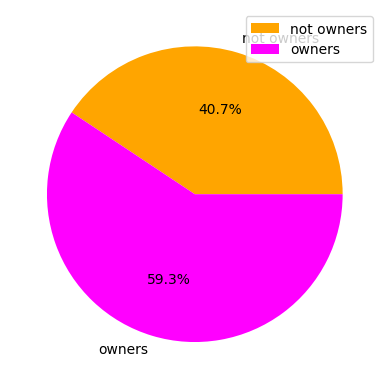

In [3]:
x = [
    df[df['owned']==0]['owned'].count(), 
    df[df['owned']==1]['owned'].count()
    ]

plt.pie(x,labels = ['not owners', 'owners'], colors = ['orange', 'magenta'], autopct='%1.1f%%')
plt.legend()
plt.show()

in the visualisation we see that the observations are balanced across categories

## Task 3
Describe the distribution of the overall rating across the possible values. Your answer
must include a visualization that shows the distribution.

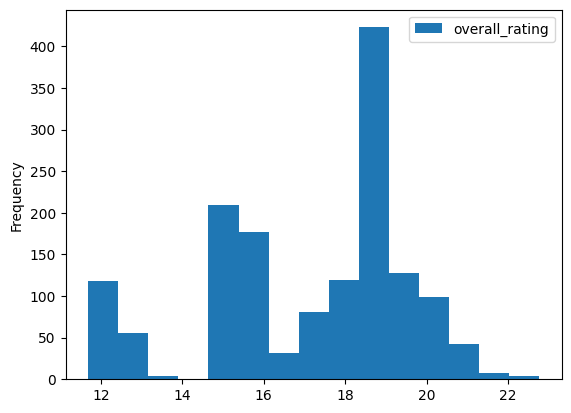

In [4]:
df["overall_rating"].plot(kind='hist' , bins = 15 , legend=True)
plt.show()

We notice that most of the rating are located between 18 and 20 and there, as well as gathering at 15 and some at 12,

## Task 4
Describe the relationship between ownership and overall rating. Your answer must
include a visualization to demonstrate the relationship.



<AxesSubplot: xlabel='owned', ylabel='overall_rating'>

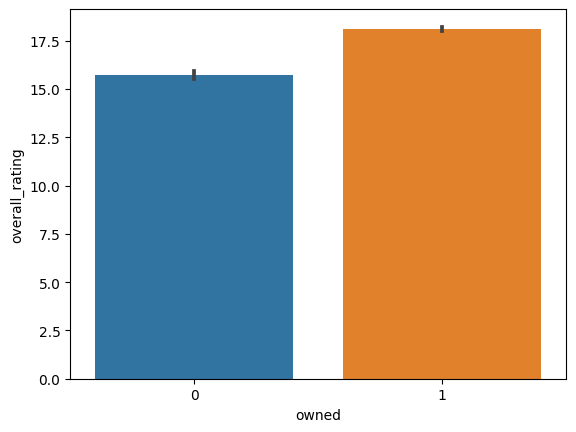

In [5]:
import seaborn as sns 
sns.barplot(data=df, x='owned', y='overall_rating')

## Task 5
The business wants to predict whether a review came from an owner or not using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).

In this case in order to predict whether a review came from an owner or not using the data provided must use the classification.

## Task 6
Fit a baseline model to predict whether a review came from an owner or not using the data provided. You must include your code.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
target_col = ['owned']
cols = ['overall_rating']


X_train, X_test, y_train, y_test = train_test_split(df[cols], df[target_col], test_size = .25, random_state = 0)


# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)


LogisticRegression()

## Task 7
Fit a comparison model to predict whether a review came from an owner or not using the data provided. You must include your code.

In [7]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree model
dtree = DecisionTreeClassifier()

# Train the model on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Task 8
Explain why you chose the two models used in parts 6 and 7.

In part 6, I chose the logistic regression model as the baseline model for predicting whether a review came from an owner or not because it is a simple and interpretable algorithm that can be used for binary classification problems. Logistic regression is a linear model that is often used as a starting point for such problems because it is easy to train, easy to understand, and fast to run.

In part 7, I chose the Decision Tree model as the comparison model because it is a non-linear model and it is powerful in terms of capturing non-linear and complex decision boundaries. Decision Tree Classifiers are considered to be good classifiers for handling categorical and numerical data, they are simple to understand and visualize, they handle missing values, they are robust to outliers and they don't require normalization of data. These are some of the reasons why I chose it as a comparison model to Logistic regression as a baseline model, so that we can compare the performance and select the better one, but again it depends on the data set, the problem and the specific requirements of the project.

## Task 9
Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

In [8]:
# Test the model LogisticRegression  on the testing data
accuracy = log_reg.score(X_test, y_test)
print("Accuracy for LogisticRegression: {:.2f}%".format(accuracy * 100))

# Test the model DecisionTreeClassifier on the testing data
accuracy = dtree.score(X_test, y_test)
print("Accuracy for DecisionTreeClassifier: {:.2f}%".format(accuracy * 100)) 

Accuracy for LogisticRegression: 71.20%
Accuracy for DecisionTreeClassifier: 64.00%


## Task 10
Explain which model performs better and why.

Based on the accuracy values you provided, it appears that the logistic regression model is performing better than the decision tree classifier. With an accuracy of 71.20%, the logistic regression model is correctly classifying around 71% of the reviews as coming from owners or not, while the decision tree classifier is correctly classifying around 64% of the reviews.

This is likely because logistic regression is a linear model, which makes it well-suited for datasets that have a clear linear boundary between the classes. Logistic regression estimates the probability of a certain class based on the input features, and it outputs a probability that can be thresholded to make a final decision. While Decision Tree classifiers are sensitive to outliers, missing values, and noise in data, and it can capture non-linear and complex decision boundaries, but it can be prone to overfitting if the tree is not pruned or regularized properly.

In conclusion, the logistic regression model performed better in this case because it is able to find a linear boundary that separates the two classes of reviews in the data set, given the accuracy is higher. However, this doesn't mean that Decision Tree Classifier is not a good model, it depends on the dataset and problem that we are trying to solve, it's always important to check the performance of different models and select the one that works best for our specific use case.